### **Tarea: Taylor** ###

Matemáticas y Estadística para Inteligencia Artificial

**Alumno**: Aminadab Córdova Acosta


Instrucciones

Los datos en la tabla muestran la probabilidad de que una persona, con un salario x, compre un producto determinado. Una función 
que comunmente se utiliza para modelar este comportamiento es la función logística:

$$ f(x) = \frac{1}{1 + e^{-(x - x_0)}} $$


donde $ x_0 $ es el punto donde la probabilidad es 0.5. Sin embargo, en términos de evaluación, es más sencillo evaluar una aproximación polinómica que evaluar esta función. Es por ello que emplearemos un polinomio de Taylor para describir estos datos.

1. Para los datos que se muestran en la tabla diga cuál cree que es el valor de $ x_0 $
2. Encuentre un polinomio de Taylor de orden 3 para la función logística alrededor de $ x_0 $
3. Evalúe el polinomio obtenido para cada uno de los salarios de la tabla
4. Encuentre el error de aproximación calculando el valor absoluto de la diferencia de los valores
aproximados y los reales
5. Grafique los valores aproximados y los reales y analice el resultado

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sympy import symbols, diff, exp

df = pd.read_excel(r'D:\Nueva carpeta\compra_producto.xlsx', usecols="B:C")
print(df)

    salario en miles  Probabilidad
0                  6  3.999969e-02
1                  7  8.315280e-07
2                  8  5.999774e-02
3                  9  3.999386e-02
4                 10  1.998330e-02
5                 11  5.995460e-02
6                 12  1.233946e-04
7                 13  5.966465e-02
8                 14  1.908895e-02
9                 15  5.752738e-02
10                16  6.692851e-03
11                17  4.201379e-02
12                18  4.742587e-02
13                19  5.920292e-02
14                20  2.089414e-01
15                21  4.400000e-01
16                22  6.710586e-01
17                23  8.407971e-01
18                24  9.125741e-01
19                25  9.220138e-01
20                26  9.933071e-01
21                27  9.775274e-01
22                28  9.390889e-01
23                29  9.796646e-01
24                30  9.998766e-01


**1. Para los datos que se muestran en la tabla diga cuál cree que es el valor de $ x_0 $**

In [9]:
# 1. Encontrar x0 (el punto donde la probabilidad es 0.5)
x0_index = (df['Probabilidad'] - 0.5).abs().idxmin()
x0 = df.loc[x0_index, 'salario en miles']
x0

21

**2. Encuentre un polinomio de Taylor de orden 3 para la función logística alrededor de $ x_0 $**

In [10]:
# 2. Polinomio de Taylor de orden 3 alrededor de x0
x = symbols('x')
f_x = 1 / (1 + exp(-(x - x0)))
taylor_poly = f_x.series(x, x0, 3).removeO()

def eval_taylor(x_val, x0, taylor_expr):
    """ Evalúa el polinomio de Taylor en un punto dado """
    return float(taylor_expr.subs(x, x_val))

**3. Evalúe el polinomio obtenido para cada uno de los salarios de la tabla**

In [12]:
df['taylor_aprox'] = df['salario en miles'].apply(lambda s: eval_taylor(s, x0, taylor_poly))
df

,salario en miles,Probabilidad,taylor_aprox
0,6,3.999969e-02,-3.25
1,7,8.315280e-07,-3.00
2,8,5.999774e-02,-2.75
3,9,3.999386e-02,-2.50
4,10,1.998330e-02,-2.25
5,11,5.995460e-02,-2.00
6,12,1.233946e-04,-1.75
7,13,5.966465e-02,-1.50
8,14,1.908895e-02,-1.25
9,15,5.752738e-02,-1.00


**4. Encuentre el error de aproximación calculando el valor absoluto de la diferencia de los valores aproximados y los reales**

In [14]:
df['error'] = abs(df['taylor_aprox'] - df['Probabilidad'])

In [15]:
df

,salario en miles,Probabilidad,taylor_aprox,error
0,6,3.999969e-02,-3.25,3.290000
1,7,8.315280e-07,-3.00,3.000001
2,8,5.999774e-02,-2.75,2.809998
3,9,3.999386e-02,-2.50,2.539994
4,10,1.998330e-02,-2.25,2.269983
5,11,5.995460e-02,-2.00,2.059955
6,12,1.233946e-04,-1.75,1.750123
7,13,5.966465e-02,-1.50,1.559665
8,14,1.908895e-02,-1.25,1.269089
9,15,5.752738e-02,-1.00,1.057527


**5. Grafique los valores aproximados y los reales y analice el resultado**

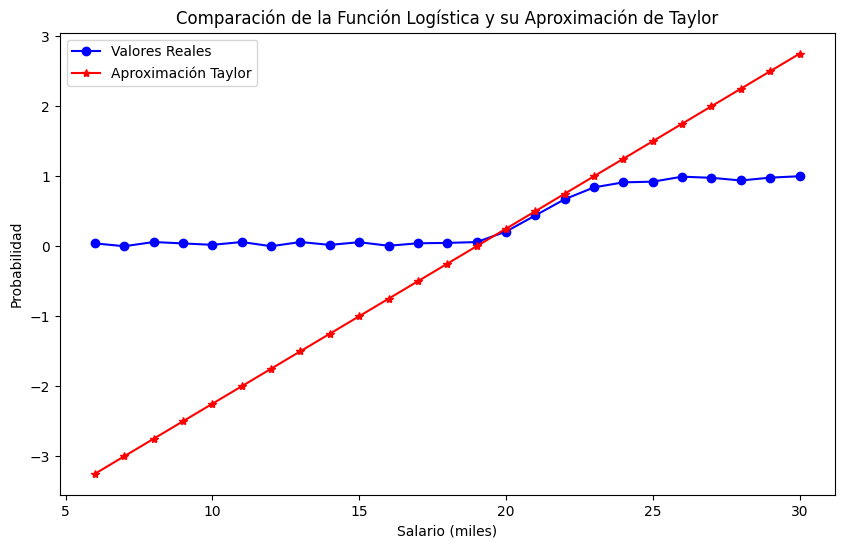

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df['salario en miles'], df['Probabilidad'], 'bo-', label='Valores Reales')
plt.plot(df['salario en miles'], df['taylor_aprox'], 'r*-', label='Aproximación Taylor')
plt.xlabel('Salario (miles)')
plt.ylabel('Probabilidad')
plt.legend()
plt.title('Comparación de la Función Logística y su Aproximación de Taylor')
plt.show()

In [19]:
# Mostrar resultados
print(df[['salario en miles', 'Probabilidad', 'taylor_aprox', 'error']])

    salario en miles  Probabilidad  taylor_aprox     error
0                  6  3.999969e-02         -3.25  3.290000
1                  7  8.315280e-07         -3.00  3.000001
2                  8  5.999774e-02         -2.75  2.809998
3                  9  3.999386e-02         -2.50  2.539994
4                 10  1.998330e-02         -2.25  2.269983
5                 11  5.995460e-02         -2.00  2.059955
6                 12  1.233946e-04         -1.75  1.750123
7                 13  5.966465e-02         -1.50  1.559665
8                 14  1.908895e-02         -1.25  1.269089
9                 15  5.752738e-02         -1.00  1.057527
10                16  6.692851e-03         -0.75  0.756693
11                17  4.201379e-02         -0.50  0.542014
12                18  4.742587e-02         -0.25  0.297426
13                19  5.920292e-02          0.00  0.059203
14                20  2.089414e-01          0.25  0.041059
15                21  4.400000e-01          0.50  0.0600